# LLM Performance Trend Analysis

This notebook analyzes the trend of LLM model performance scores over time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

# Set style for plots
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

## Load and Prepare Data

In [11]:
# Load the CSV data
df = pd.read_csv('llm_perf_chart.csv')

# Display the first few rows to understand the data
df.head()

,Model,Releasedate,Organization,Global Average,Reasoning Average,Coding Average,Mathematics Average,Data Analysis Average,Language Average,IF Average,SourceURL
0,o3 High,2025/4/16,OpenAI,81.55,93.33,73.33,84.67,75.80,76.00,86.17,NaN
1,o3 Medium,2025/4/16,OpenAI,79.22,91.00,72.62,80.66,73.21,73.48,84.32,NaN
2,o4-Mini High,2025/04/16,OpenAI,78.13,88.11,74.33,84.90,70.43,66.05,84.96,NaN
3,Gemini 2.5 Pro Experimental,NaN,Google,77.43,87.53,58.09,89.16,79.89,69.31,80.59,NaN
4,o4-Mini Medium,NaN,OpenAI,72.75,78.47,61.81,81.02,70.96,62.41,81.83,NaN


In [12]:
# Check data types and null values
print("Data types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Check unique organizations
print("\nNumber of unique organizations:", df['Organization'].nunique())
print("Unique organizations:\n", df['Organization'].unique())

Data types:
 Model                     object
Releasedate               object
Organization              object
Global Average           float64
Reasoning Average        float64
Coding Average           float64
Mathematics Average      float64
Data Analysis Average    float64
Language Average         float64
IF Average               float64
SourceURL                 object
dtype: object

Missing values:
 Model                      0
Releasedate               69
Organization              30
Global Average             0
Reasoning Average          0
Coding Average             0
Mathematics Average        0
Data Analysis Average      0
Language Average           0
IF Average                 0
SourceURL                111
dtype: int64

Number of unique organizations: 15
Unique organizations:
 ['OpenAI' 'Google' 'Anthropic' 'xAI' 'DeepSeek' 'Alibaba' 'Meta' 'Tencent'
 'StepFun' 'Cohere' 'AbacusAI' 'Mistral AI' 'Microsoft' 'Amazon' 'SoundAI'
 nan]


In [13]:
# Convert release dates to datetime format and handle missing values
df['Releasedate'] = pd.to_datetime(df['Releasedate'], format='%Y/%m/%d', errors='coerce')

# Filter out entries with missing release dates for time-based analysis
df_with_dates = df.dropna(subset=['Releasedate']).copy()

print(f"Total models: {len(df)}")
print(f"Models with release dates: {len(df_with_dates)}")

# Sort by release date
df_with_dates = df_with_dates.sort_values('Releasedate')

Total models: 135
Models with release dates: 66


## Performance Trend Visualization

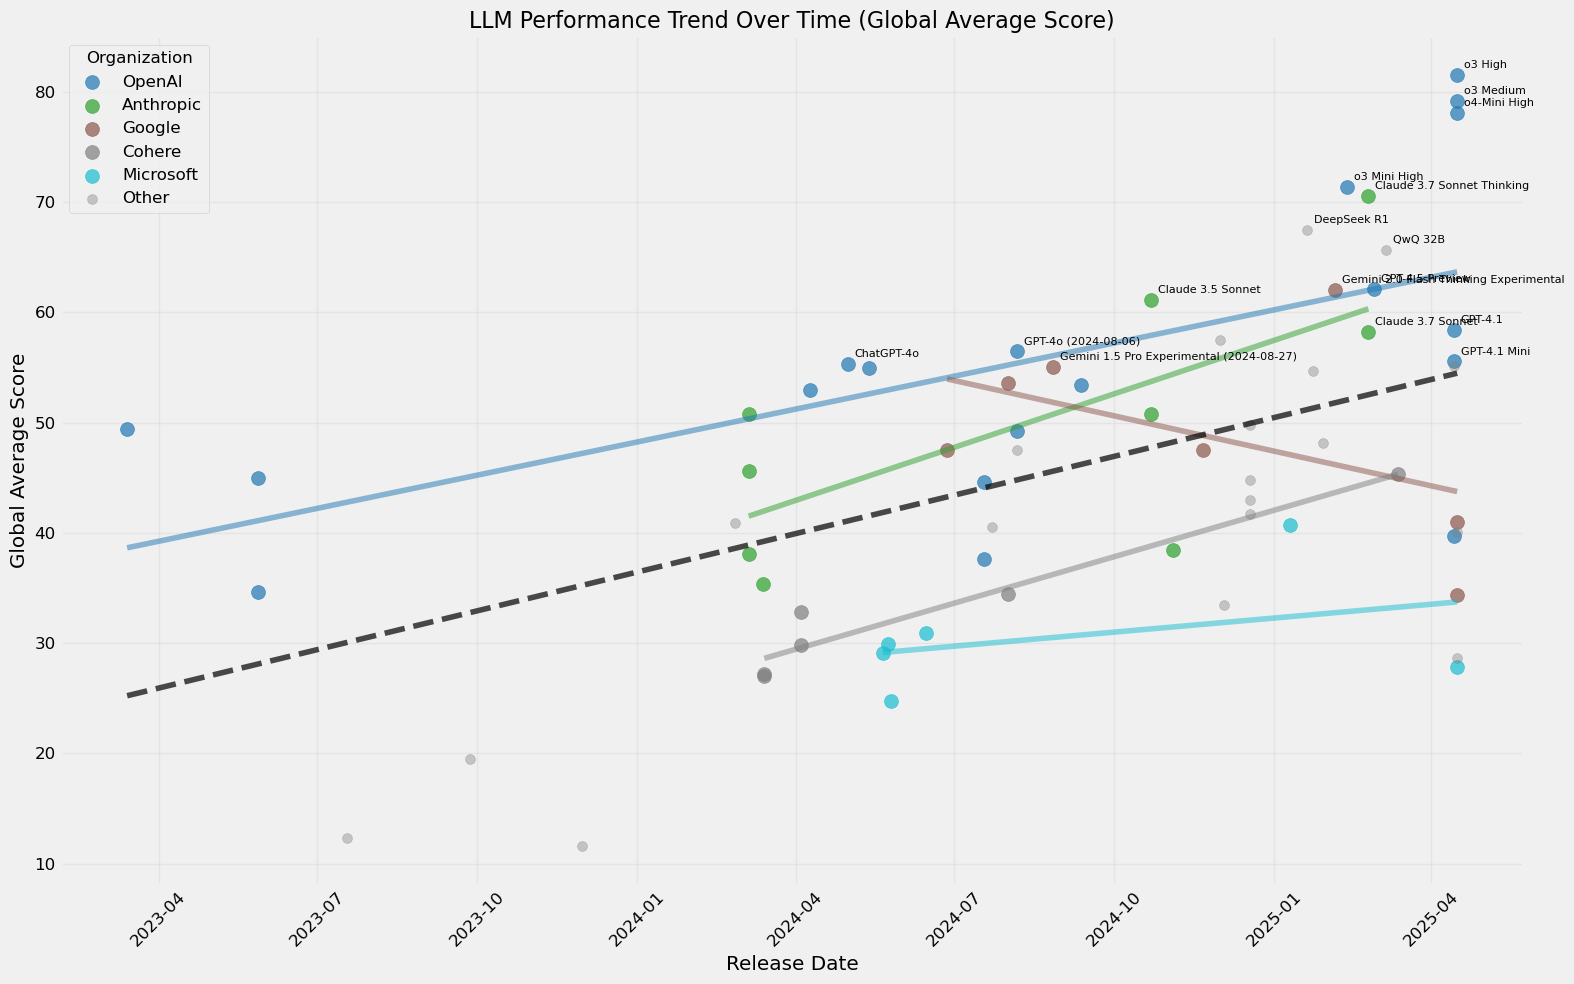

In [14]:
# Create a plot of Global Average scores over time
plt.figure(figsize=(16, 10))

# Get top organizations by number of models
top_orgs = df_with_dates['Organization'].value_counts().head(5).index.tolist()

# Create a colormap for organizations
colors = plt.cm.tab10(np.linspace(0, 1, len(top_orgs)))
org_colors = dict(zip(top_orgs, colors))

# Plot for top organizations with different colors
for org in top_orgs:
    org_data = df_with_dates[df_with_dates['Organization'] == org]
    plt.scatter(org_data['Releasedate'], org_data['Global Average'], 
               label=org, s=100, alpha=0.7, color=org_colors[org])
    
    # Add a trendline for each organization
    if len(org_data) > 1:  # Need at least 2 points for a line
        z = np.polyfit(org_data['Releasedate'].astype(int) / 10**18, org_data['Global Average'], 1)
        p = np.poly1d(z)
        plt.plot(org_data['Releasedate'], 
                 p(org_data['Releasedate'].astype(int) / 10**18), 
                 '-', color=org_colors[org], alpha=0.5)

# Plot other organizations with gray color
other_orgs = df_with_dates[~df_with_dates['Organization'].isin(top_orgs)]
plt.scatter(other_orgs['Releasedate'], other_orgs['Global Average'], 
           label='Other', s=50, alpha=0.4, color='gray')

# Add annotations for some notable models
for idx, row in df_with_dates.iterrows():
    if row['Global Average'] > 65 or (row['Organization'] in top_orgs and row['Global Average'] > 55):
        plt.annotate(row['Model'], 
                     (row['Releasedate'], row['Global Average']),
                     xytext=(5, 5),
                     textcoords='offset points',
                     fontsize=8)

# Format the x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Add labels and title
plt.xlabel('Release Date')
plt.ylabel('Global Average Score')
plt.title('LLM Performance Trend Over Time (Global Average Score)', fontsize=16)

# Add grid and legend
plt.grid(True, alpha=0.3)
plt.legend(title='Organization')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a best-fit line for the overall trend
z = np.polyfit(df_with_dates['Releasedate'].astype(int) / 10**18, df_with_dates['Global Average'], 1)
p = np.poly1d(z)
plt.plot(df_with_dates['Releasedate'], p(df_with_dates['Releasedate'].astype(int) / 10**18), 
         'k--', label='Overall Trend', alpha=0.7)

plt.tight_layout()
plt.show()

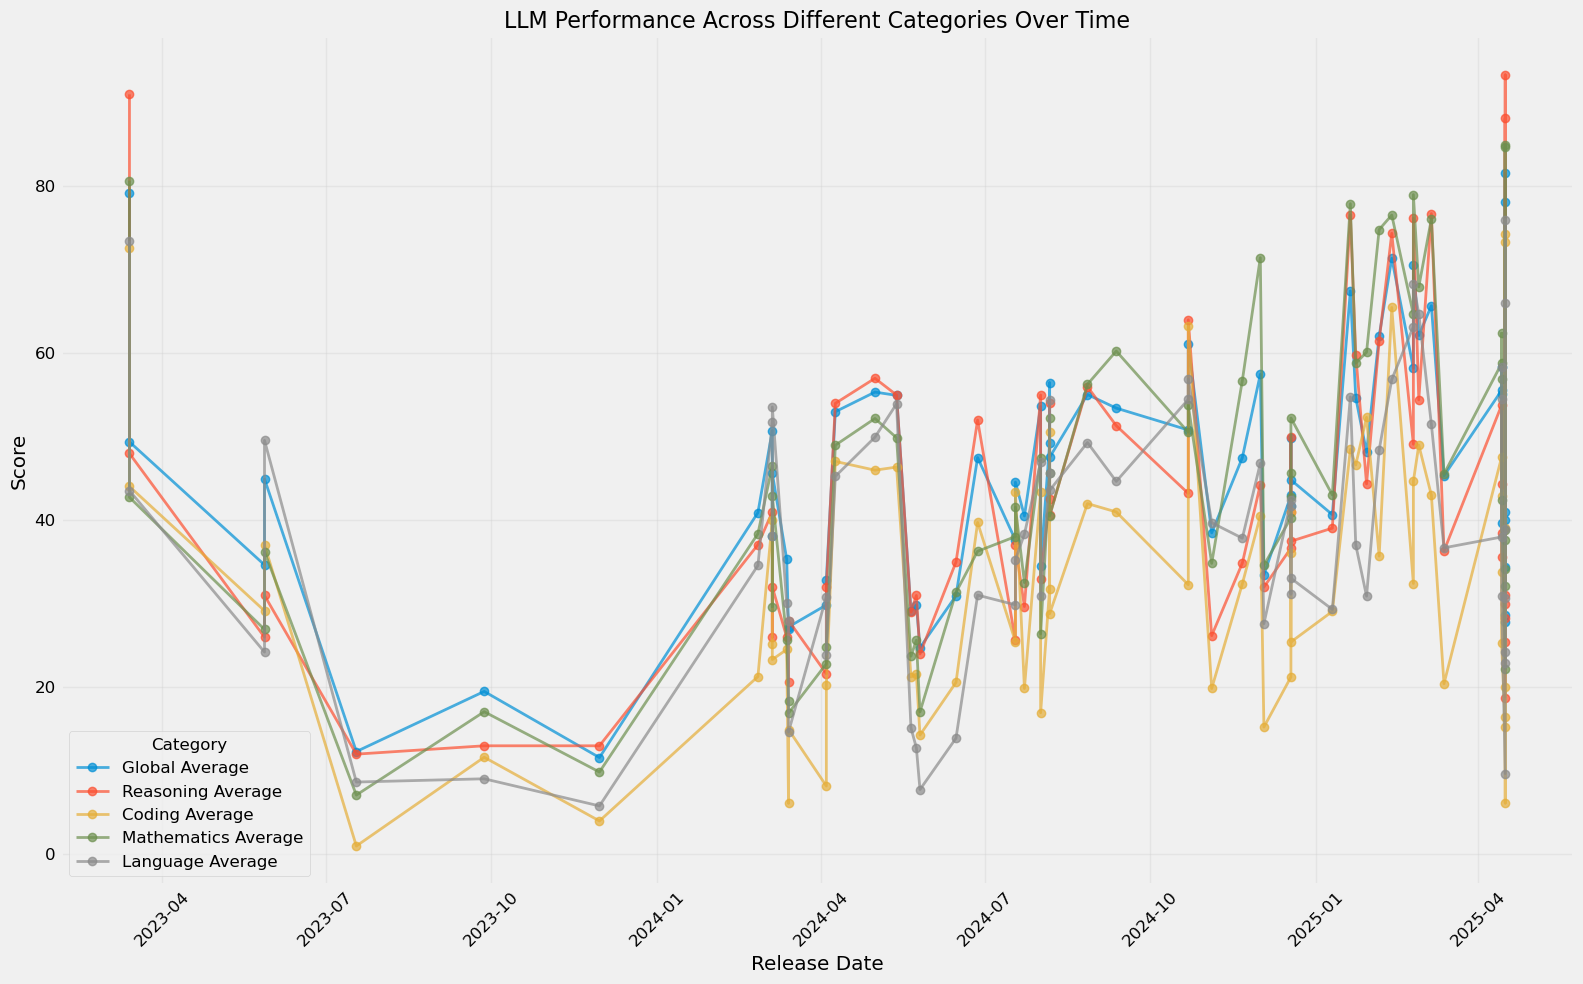

In [6]:
# Create a multi-line plot for different performance categories
plt.figure(figsize=(16, 10))

# Select categories to plot
categories = ['Global Average', 'Reasoning Average', 'Coding Average', 
             'Mathematics Average', 'Language Average']

# Plot each category as a separate line
for category in categories:
    plt.plot(df_with_dates['Releasedate'], df_with_dates[category], 
             marker='o', linestyle='-', linewidth=2, alpha=0.7, label=category)

# Format the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

plt.xlabel('Release Date')
plt.ylabel('Score')
plt.title('LLM Performance Across Different Categories Over Time', fontsize=16)

plt.grid(True, alpha=0.3)
plt.legend(title='Category')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

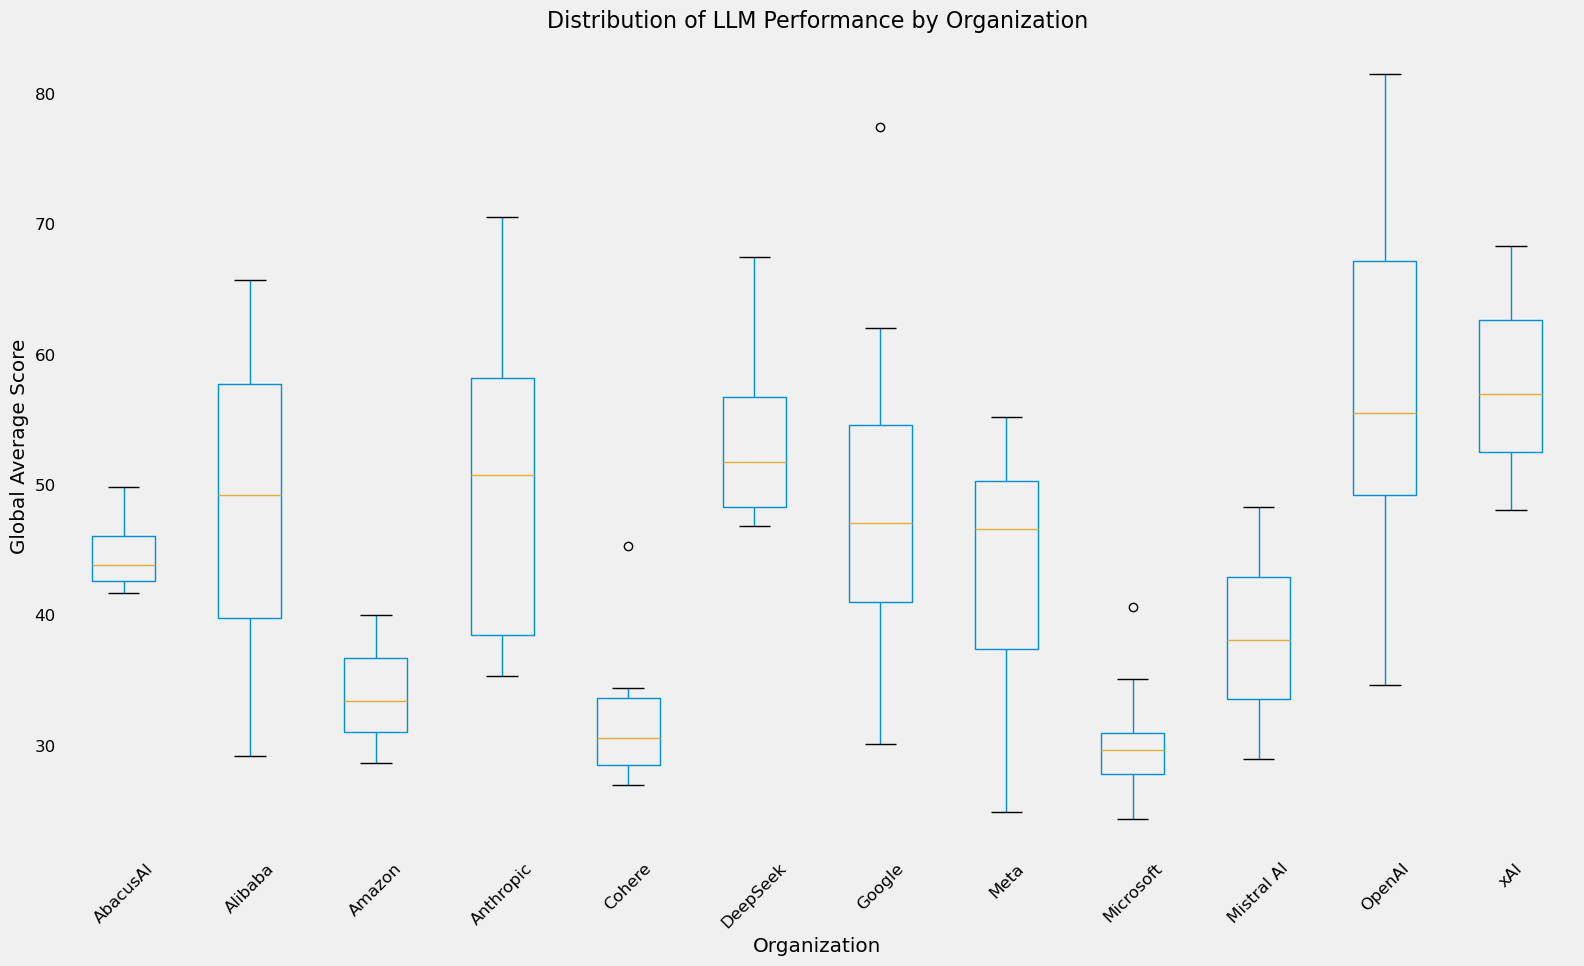

In [7]:
# Create a boxplot to compare score distributions by organization
plt.figure(figsize=(16, 10))

# Filter to organizations with at least 3 models
org_counts = df['Organization'].value_counts()
orgs_with_multiple_models = org_counts[org_counts >= 3].index.tolist()

# Create a filtered dataframe
df_filtered = df[df['Organization'].isin(orgs_with_multiple_models)]

# Create the boxplot
boxplot = df_filtered.boxplot(column='Global Average', by='Organization', grid=False, 
                            figsize=(16, 10), rot=45)

# Add labels and title
plt.xlabel('Organization')
plt.ylabel('Global Average Score')
plt.title('Distribution of LLM Performance by Organization', fontsize=16)
plt.suptitle('')  # Remove default suptitle

plt.tight_layout()
plt.show()

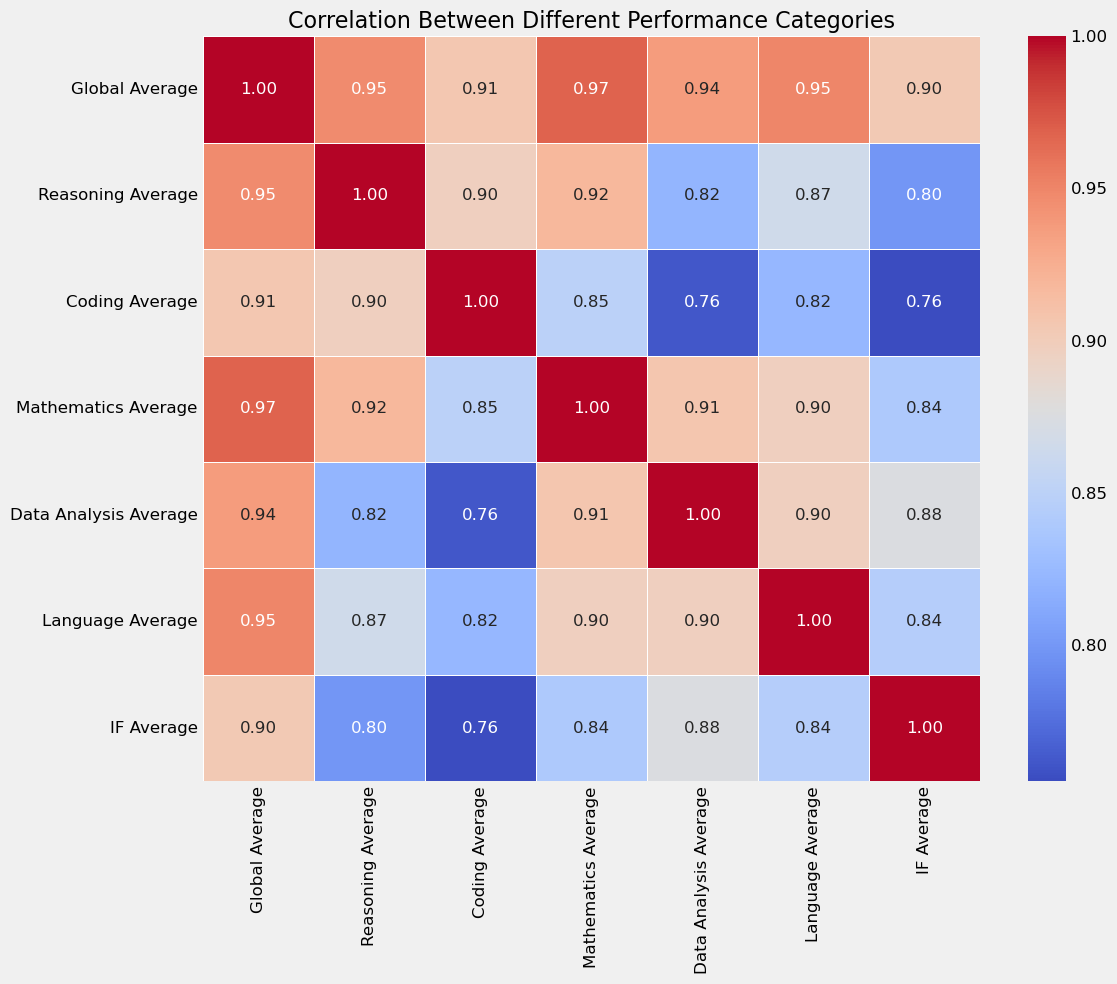

In [9]:
# Create a heatmap of correlations between different score categories
import seaborn as sns

plt.figure(figsize=(12, 10))

# Select only the numerical columns for correlation analysis
score_cols = ['Global Average', 'Reasoning Average', 'Coding Average', 
              'Mathematics Average', 'Data Analysis Average', 'Language Average', 'IF Average']

# Calculate the correlation matrix
corr_matrix = df[score_cols].corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

plt.title('Correlation Between Different Performance Categories', fontsize=16)
plt.tight_layout()
plt.show()

## Conclusion

From the visualizations above, we can observe several trends in LLM performance:

1. Overall, there is a positive trend in LLM performance scores over time, indicating technological advancement.
2. Different organizations show varying patterns in their model performance improvements.
3. Performance across different categories (reasoning, coding, mathematics, etc.) has improved at different rates.
4. There appears to be strong correlation between certain performance categories.

These insights help us understand the evolution of LLM capabilities and the competitive landscape among different AI organizations.